# TSP 
In this document we will analyze the travelling salesman problem.

Author: Luca Fabbian <luca.fabbian.1999@gmail.com>

In [1]:
// $$ipycpp_file: src/main.cpp
// $$ipycpp_build: TSP_FILE="./data/test2.tsp" mkdir -p bin && g++ -o3 -o bin/main src/main.cpp -fopenmp
// $$ipycpp_run: bin/main

#include <stdio.h>
#include <string.h>
#include <stdlib.h>
#include <math.h>
#include <time.h>
#include <stdbool.h>
#include <memory.h>
#include <omp.h>
#include <mutex>


#include "tsp.cpp"
#include "heuristic.cpp"

void allPossibleStartsSingleThread(const TSP &tsp){

	// start clock
	clock_t start = clock();

	// try every possible starting point
	TSPSolution *minSol = new TSPSolution(&tsp);
	solveGreed(minSol);
	int minIndex = 0;

	TSPSolution *challenger = new TSPSolution(&tsp);

	for(int i = 1; i < tsp.dim; i++){
	solveGreed(challenger, i);
		if(challenger->cost < minSol->cost){
			auto tmp = minSol;
			minSol = challenger;
			challenger = tmp;
			minIndex = i;
		}
	}
	

	// stop timer
	clock_t end = clock();
	double time = (double)(end - start) / CLOCKS_PER_SEC;

	// print solution cost
	printf("starting point = %d, cost = %d\n", minIndex, minSol->cost);
	//print time
	printf("time = %f\n", time);

	// plot points
	minSol->plot(true);

}

void allPossibleStartsParallel(const TSP &tsp){
	std::mutex mtx;

	// start clock
	clock_t start = clock();

	// try every possible starting point
	TSPSolution *minSol = new TSPSolution(&tsp);
	solveGreed(minSol);
	int minIndex = 0;


	#pragma omp parallel num_threads(8)
	{
		printf("New thread\n");
		TSPSolution *challenger = new TSPSolution(&tsp);
		#pragma omp for
		for(int i = 1; i < tsp.dim; i++){
			challenger->fill();
			solveGreed(challenger, i);
			#pragma omp critical
			if(challenger->cost < minSol->cost){
				auto tmp = minSol;
				minSol = challenger;
				challenger = tmp;
				minIndex = i;
			}
		}

	}


	// stop timer
	clock_t end = clock();
	double time = (double)(end - start) / CLOCKS_PER_SEC;

	// print solution cost
	printf("starting point = %d, cost = %d\n", minIndex, minSol->cost);
	//print time
	printf("time = %f\n", time);

	// plot points
	minSol->plot(true);

}


In [5]:
auto html = R""""(

<div class="widgetcontainer">
	<div class="widget" v-scope="{ count: 0 }">
		<button @click="count--">-</button>
		{{ count }}
		<button @click="count++">+</button>
	</div>

	<script>
	if(!window.INSTALL_PETITE_VUE){
		window.INSTALL_PETITE_VUE = true;
		var script = document.createElement('script');
		script.src = 'https://unpkg.com/petite-vue';
		document.head.appendChild(script);
	}

	PetiteVue.createApp().mount(document.currentScript.previousElementSibling)
	</script>
</div>
)"""";

#ifdef IPYCPP_MAIN
#define IPYCPP_MAIN_METHOD
int main(){
	printf("$$$ipycppr_html_start$$$\n%s\n$$$ipycppr_html_end$$$\n", html);
}
#endif

- 
 {{ count }}
 +

In [6]:
#ifdef IPYCPP_MAIN
#define IPYCPP_MAIN_METHOD
int main(){
	printf("$$$ipycppr_html_start$$$\n%s\n$$$ipycppr_html_end$$$\n", html);
	printf("$$$ipycppr_html_start$$$\n%s\n$$$ipycppr_html_end$$$\n", html);
}
#endif

- 
 {{ count }}
 +

- 
 {{ count }}
 +

dim = 5
New thread
New thread
New thread
New thread
New thread
New thread
New thread
New thread
starting point = 0, cost = 10242
time = 0.001698


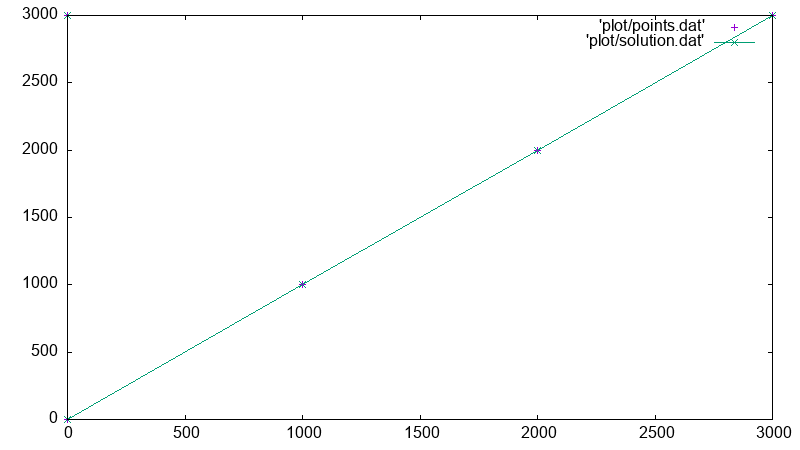

In [4]:


#ifdef IPYCPP_MAIN
#define IPYCPP_MAIN_METHOD
int main(){
	TSP tsp("./data/test.tsp");

	// initialize random seed
	srand(2306654);
	allPossibleStartsParallel(tsp);
}
#endif